In [2]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
#load the datasets using pandas function .read_csv()
df=pd.read_csv("spam.csv", encoding='latin 1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#the above datasets contains three unanmed coloumn with null values, so we drop those coloumns and rename the coloumn v1 and v2 to label and text 

#  Drop unnecessary or empty columns from the DataFrame
# 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4' are likely blank columns
# that came from a CSV file (common when the file has extra commas or separators)
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

#  Rename the existing columns for better readability
# The original dataset had column names 'v1' and 'v2' (possibly from the SMS Spam dataset)
# We rename them to more descriptive names: 'label' and 'Text'
df=df.rename(columns={'v1':'label','v2':'text'})

#  Encode text labels into numerical values
# 'ham' (not spam) is mapped to 0, and 'spam' is mapped to 1
# This is essential because machine learning models work with numbers, not text labels
df['label_enc']=df['label'].map({'ham':0, 'spam':1})
df.head()

,label,text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


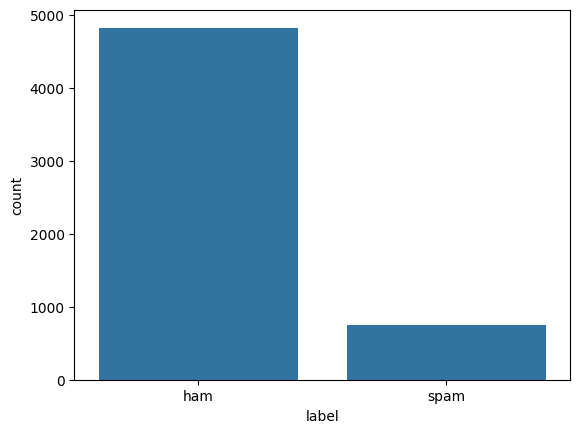

In [9]:
sns.countplot(x=df['label'])
plt.show()

In [10]:
# Here despite the ma data is comparatively hifher than spam data but we are going to use embedding in our deep learning model, so we don't need to balance
# the data.

# Find average number of tokens in all sentences
avg_words_len= round(sum([len(i.split()) for i in df['text']])/ len(df['text']) )
print(avg_words_len)


16


In [12]:
# Finding Total no of unique words in corpus


# Create an empty set to store unique words
# Sets automatically handle duplicates - each element appears only once
s=set()

# Iterate through each sentence/document in the 'text' column of the dataframe
for sent in df ['text']:
    
    # Split each sentence into individual words using space as delimiter
    # sent.split() converts a sentence string into a list of words
    # Example: "hello world" becomes ["hello", "world"]
    for word in sent.split():
        
        # Add each word to the set
        # If the word already exists in the set, it won't be added again
        # This ensures only unique words are stored
        s.add(word)
        
# Calculate the total number of unique words by getting the length of the set
total_word_length= len(s)
print(total_word_length)        


15686


In [ ]:
#spitting data for training and testing
from sklearn.model_selection import train_test_split


# Convert dataframe columns to numpy arrays for better performance and compatibility
# X: Features (text data)
# y: Target variable (encoded labels)
X,y =np.asanyarray(df['text']), np.asanyarray(df['label_enc'])

# Create a new dataframe with the converted arrays
# This ensures data consistency and proper alignment between features and labels
new_df = pd.DataFrame({'text': X, 'label':y})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(
    new_df['text'], # Features (text data)
    new_df ['label'],  # Target labels
    test_size=0.2,  # 20% of data for testing, 80% for training
    random_state= 42  # Seed for reproducibility - ensures same split every time
    )

# Check the shapes of the resulting datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4457,), (4457,), (1115,), (1115,))

In [14]:
# Building models
# first I will use a baseline model and then I will try to beat the performance of baseline model using learning models (embeddings, LSTM, etc) 
# I will choose multinomialNB(), which performs well for text classification when the features are discrete like word counts of the wprds pr tf-idf vectors.
# The tf-idf is a measure that tells how important or relevant a word is the document.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)


baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

MultinomialNB()